In [1]:
from PIL import Image
#from io import BytesIO
import numpy as np

import matplotlib.colors as clr
import matplotlib.pyplot as plt
#from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
%matplotlib inline

In [2]:
#plt.style.use('seaborn-paper')
# Update the matplotlib configuration parameters:
plt.rcParams.update({
                    'font.family': 'sans-serif',
                    'font.sans-serif': 'Helvetica',
                    'text.usetex': False,
#                     'lines.linewidth': 5,
                     'font.size': 22,
                     'xtick.direction': 'in',
                     'ytick.direction': 'in',
                     'xtick.labelsize': 'large',
                     'ytick.labelsize': 'large',
                     'axes.labelsize': 'medium',
                     'axes.titlesize': 'medium',
                     'axes.grid.axis': 'both',
                     'axes.grid.which': 'both',
                     'axes.grid': True,
                     'grid.color': 'xkcd:Charcoal',
                     'grid.alpha': 0.253,
                     'lines.markersize': 8,
                     'legend.borderpad': 0.2,
#                     'legend.fancybox': True,
                     'legend.fontsize': 'medium',
                     'legend.framealpha': 0.7,
                     'legend.handletextpad': 0.5,
                     'legend.labelspacing': 0.33,
                     'legend.loc': 'best',
                     'figure.figsize': (14, 10),
                     'savefig.dpi': 140,
                     'pdf.compression': 9})

#plt.rcParams['mathtext.fontset'] = 'custom'
#plt.rcParams['mathtext.rm'] = 'Times New Roman'
#matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
#matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

In [3]:
fnames=[]
for ii in range(7):
    fnames.append(str(2**ii)+'.jpg')

0 1000 42.008 493.94988588588586 22.22498337200471
1 1000 34.541 288.03034934934936 16.971456901201776
2 1000 28.964 207.50821221221221 14.405145338114858
3 1000 24.053 120.14633733733736 10.961128470068095
4 1000 20.555 90.91589089089089 9.534982479841842
5 1000 17.691 63.13064964964965 7.945479825010548
6 1000 15.668 53.91769369369369 7.342866857957707


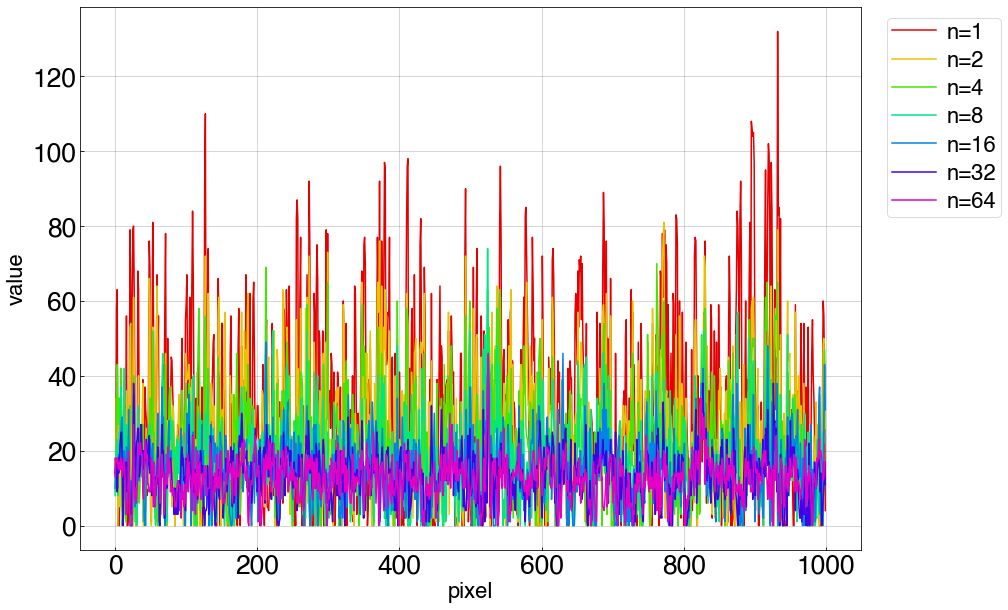

In [6]:
ii_list  = []
mn_list  = []
var_list = []
std_list = []
    
i_start=501450
#i_start=1000
#i_end=i_start+1000
#i_end=505450

fig, ax1 = plt.subplots(1)

for ii,fname in enumerate(fnames):
    img=Image.open(fname)
    img_ary=np.asarray(img)
    img_ary_flat=img_ary.flatten()
    r_ary=img_ary_flat[::3]
    g_ary=img_ary_flat[1::3]
    b_ary=img_ary_flat[2::3]

    ax1.plot(r_ary[i_start:i_end],'-',color=clr.hsv_to_rgb((ii/(len(fnames)),1,.9)),label='n='+fname[:-4])
    ax1.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
    ax1.set_xlabel('pixel')
    ax1.set_ylabel('value')
    
    n=len(b_ary[i_start:i_end])
    mn=np.mean(b_ary[i_start:i_end])
    var=np.sum((b_ary[i_start:i_end]-mn)**2)/(n-1)
    std=np.sqrt(var)
    print(ii,n,mn,var,std)

    ii_list.append(2**ii)
    mn_list.append(mn)
    var_list.append(var)
    std_list.append(std)

plt.savefig('./pixel.png', bbox_inches='tight')

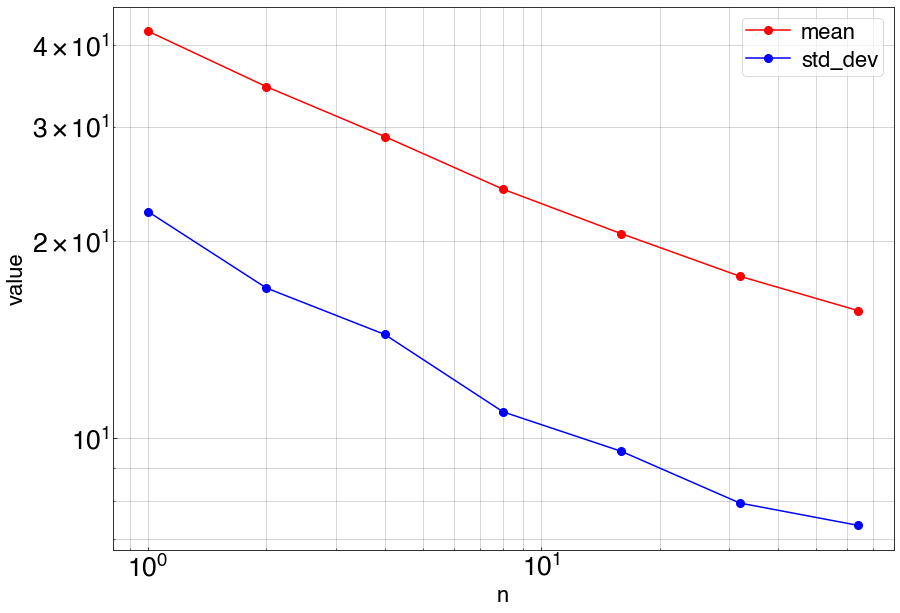

In [7]:
fig, ax1 = plt.subplots(1)

ax1.loglog(ii_list, mn_list,'ro-',label='mean')
ax1.loglog(ii_list, std_list,'bo-',label='std_dev')
ax1.legend(loc='best')
ax1.set_xlabel('n')
ax1.set_ylabel('value')

plt.savefig('./mean_std.png', bbox_inches='tight')